# Part 5 - Production Model & Insights


As our business problem requires us to optimize the number of features to be used in our valuation app on the website, we will select the number of features based on the RMSE gain over the baseline (RMSE from top 5 features).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

reference = pd.read_csv("df_clean_ordinal_encoded.csv")
df = pd.read_csv("df_production.csv")
df

,number_of_features,RMSE,coef_weights,coefficients,intercept
0,5,30273.521,[ 0.14053554 0.21168776 -0.27008266 0.308788...,"Index(['Gr Liv Area', 'Overall Qual', 'has_bsm...",12.023425
1,10,25563.945,[ 0.13073036 0.16167758 -0.22179721 0.037306...,"['Gr Liv Area', 'Overall Qual', 'has_bsmt', 'O...",12.023425
2,15,25613.451,[ 0.12390228 0.14841647 -0.17552966 0.043898...,"['Gr Liv Area', 'Overall Qual', 'has_bsmt', 'O...",12.023425
3,20,24522.634,[ 0.11897838 0.12412979 -0.14102237 0.042980...,"['Gr Liv Area', 'Overall Qual', 'has_bsmt', 'O...",12.023425
4,25,22861.814,[ 0.12213601 0.10361667 -0.11976441 0.045399...,"['Gr Liv Area', 'Overall Qual', 'has_bsmt', 'O...",12.023425
5,30,21400.976,[ 0.12122448 0.09320725 -0.11655218 0.046910...,"['Gr Liv Area', 'Overall Qual', 'has_bsmt', 'O...",12.023425


## Visualizing The RMSE Scores
---
From the plot below, we can see that there is an inverse relationship with the number of features included in our model with the RMSE during training. We have also manually input our kaggle Private Leaderboard Scores.


The Ridge regression model using Top 5 features will serve as our baseline RMSE as we expect the scores to get better as we include more features. As mentioned above, with the exception of the baseline, inclusion of additional features tend to increase the RMSE of the model when exposed to unseen data.


The model likely does not have an overfitting as it uses relatively few features (max 30/90 features) and the RMSE score, nor is it an underfitting problem as the RMSE score when all 90 features are fitted (approx 20K) is relatively close to the RMSE score with 30 features (approx 21K). Therefore a plausible explanation would be the presence of outliers in the Kaggle test set, which adversely impacted the performance of the regression model.

In [2]:
df.dtypes

number_of_features      int64
RMSE                  float64
coef_weights           object
coefficients           object
intercept             float64
dtype: object

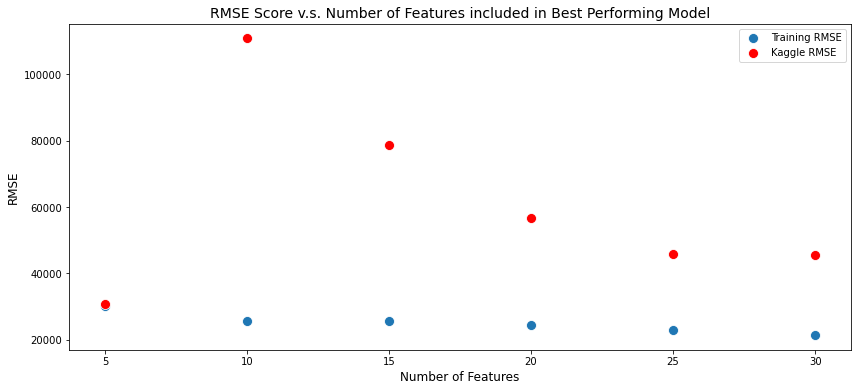

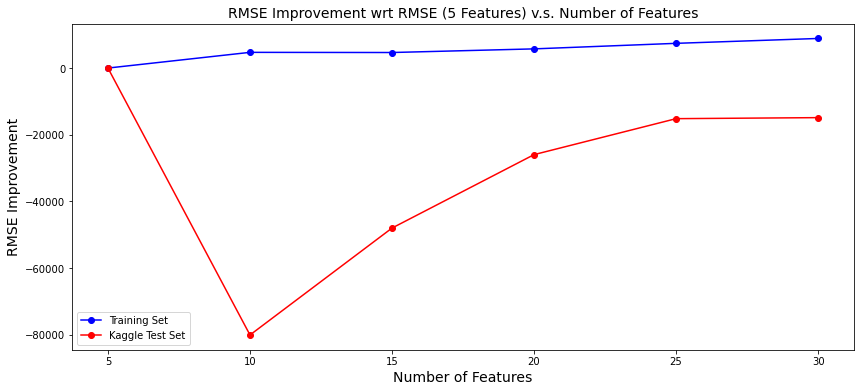

In [3]:
# manually retrieve my kaggle private score
kaggle = [30767, 110795, 78737, 56719, 45939, 45631]

df["kaggle_private_score_rmse"] = kaggle

plt.figure(figsize=(14,6))
sns.scatterplot("number_of_features", "RMSE", data=df, label= "Training RMSE", s=100)
sns.scatterplot("number_of_features", "kaggle_private_score_rmse", data=df, color="r", label="Kaggle RMSE", s=100)
plt.title("RMSE Score v.s. Number of Features included in Best Performing Model", fontsize=14)
plt.xlabel("Number of Features", fontsize=12)
plt.ylabel("RMSE", fontsize=12)
plt.legend()
plt.show()

df["RMSE_improvement"] = -(df["RMSE"]-df.iloc[0,1])
df["RMSE_improvement_kaggle"] = -(df["kaggle_private_score_rmse"]-df.iloc[0,5])


plt.figure(figsize=(14,6))
plt.plot(df["number_of_features"],df["RMSE_improvement"], "bo-", label="Training Set")
plt.plot(df["number_of_features"],df["RMSE_improvement_kaggle"], "ro-", label= "Kaggle Test Set")
plt.title("RMSE Improvement wrt RMSE (5 Features) v.s. Number of Features", fontsize=14)
plt.ylabel("RMSE Improvement", fontsize=14)
plt.xlabel("Number of Features", fontsize=14)
plt.legend()
plt.show()

### Accuracy - User Experience Trade-off


Examining the RMSE gain shows that no significant increases in RMSE is obtained by increasing the number of features beyond the top 5 features. In fact for the test set, the performance initially by including 10 coefficients, and recover thereafter but still performing below the RMSE score of the top 5 features.

Selecting 10 features led to a RMSE (taking the kaggle test set) that is approximately 18% (or ~$30K) of the mean SalePrice of the training set, which is acceptable given that the valuation obtained via our web app is supposed to be a preliminary valuation.

Therefore, we will select features = **5** as the number of features in our web app that requires user input. This is in agreement with existing User Experience (UX) literature to keep fields in a form to below 10 fields for optimal user engagement and conversion.

In [4]:
mean_saleprice = np.expm1(reference["SalePrice"].mean())
pct = 100*round(df.iloc[0,4]/mean_saleprice, 2)

print(f"The difference in RMSE translates to {pct} % of the mean SalePrice")
display(df)

The difference in RMSE translates to 0.0 % of the mean SalePrice


,number_of_features,RMSE,coef_weights,coefficients,intercept,kaggle_private_score_rmse,RMSE_improvement,RMSE_improvement_kaggle
0,5,30273.521,[ 0.14053554 0.21168776 -0.27008266 0.308788...,"Index(['Gr Liv Area', 'Overall Qual', 'has_bsm...",12.023425,30767,-0.000,0
1,10,25563.945,[ 0.13073036 0.16167758 -0.22179721 0.037306...,"['Gr Liv Area', 'Overall Qual', 'has_bsmt', 'O...",12.023425,110795,4709.576,-80028
2,15,25613.451,[ 0.12390228 0.14841647 -0.17552966 0.043898...,"['Gr Liv Area', 'Overall Qual', 'has_bsmt', 'O...",12.023425,78737,4660.070,-47970
3,20,24522.634,[ 0.11897838 0.12412979 -0.14102237 0.042980...,"['Gr Liv Area', 'Overall Qual', 'has_bsmt', 'O...",12.023425,56719,5750.887,-25952
4,25,22861.814,[ 0.12213601 0.10361667 -0.11976441 0.045399...,"['Gr Liv Area', 'Overall Qual', 'has_bsmt', 'O...",12.023425,45939,7411.707,-15172
5,30,21400.976,[ 0.12122448 0.09320725 -0.11655218 0.046910...,"['Gr Liv Area', 'Overall Qual', 'has_bsmt', 'O...",12.023425,45631,8872.545,-14864


## Insights


### 1. Interpretation of Coefficients


The coefficients of Ridge regression model using the top 5 features is shown in the dataframe below and can be interpreted as such (due to Log1p transformations on the target and the features) instead of a **unit change** of a feature causinga constant change in the target, the effect of the features on the target will be in terms of percentages.

**The coefficient can be interpreted as the approximate percent increase in the the target(`SalePrice`) for every 1% increase in the features while holding other features constant.**


For example, this means that a 1% increase in `Gr Liv Area` would result in a ~0.14% increase in the `SalePrice`, holding the other 9 features constant. The largest contributor to `SalePrice` is `Gr Liv Area`.


#### Observation 1: Basements lower value
In addition, we observe that a property having a basement is the 2nd largest coefficient and is negative. This means that the properties with basements will be penalized and have a lower valuation.


#### Observation 2: Living Area takes precedence over actual lot area
In general, the living area of a property is contributes more to its valuation than the actual lot area of the property itself.


#### Observation 3: Improving the overall condition and property of a home improves value
As seen from the inclusion of `Overall Qual` and `Overall Cond` as the top 5 coefficients, owners who wish to increase their property's value may opt to conduct refurbishment works as it will contribute towards its value.

In [22]:
df.iloc[0,2]

'[ 0.14053554  0.21168776 -0.27008266  0.30878855  0.04276423]'

In [23]:
# preprocess the dataframe information
top5_coefs = [0.14053554, 0.21168776, -0.27008266, 0.30878855, 0.04276423]

import ast
df.iloc[0,3] = df.iloc[0,3].replace("Index","").replace(", dtype='object'", "")
top_names = ast.literal_eval(df.iloc[0,3])

df_top5 = pd.DataFrame({"feature_names":top_names, "feature_coefs": top5_coefs})
display(df_top5)

,feature_names,feature_coefs
0,Gr Liv Area,0.140536
1,Overall Qual,0.211688
2,has_bsmt,-0.270083
3,Overall Cond,0.308789
4,Lot Area,0.042764


## Answering the Business Question & Future Work


We have selected the Ridge Regression model with 5 features as the most performing model for our web app. The RMSE is approximately $30,000 and is sufficient to provide a preliminary valuation to provide a benchmark for our users in the USA. On our website, the user will be asked to input the following information to feed into our regression model:

- `Gr Liv Area`:Above grade (ground) living area square feet
- `Overall Qual`: Rates the overall quality of the property
- `has_bsmt`: Whether the property has a basement
- `Overall Cond`: Rates the overall material and finish of the property
- `Lot Area`: Lot size in square feet


Having such a low number of features also improves the User Experience as it would not take up too much time to fill in the information required by our app.


The accuracy of the model can be further improved by:


1. Collecting more data from our US cities as certain preferences may be unique to Ames, Iowa. Collecting more samples will allow the model to generalize better to unseen data.


2. There are many hidden features inside the `Neighborhood` feature as many other possible other features characterize whether a property in a particular neighborhood is of value, such as crime rate, proximity to good schools, proximity to employment centers or near rivers/lakes. Such features should be collected instead of stating the neighborhood of the property.